$$
\begin{cases}
    \dot{x} = \theta (x-y)\\
    \dot{y} = x(\mu - z) -y \\
    \dot{z} = xy - \beta z
\end{cases}
$$

In [156]:
include("UsefulFunctions.jl")
include("lorentz_system.jl")
include("/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/Solvers.jl")
include("Energy_conserving_parameters.jl")

Mu (generic function with 1 method)

In [115]:
using DifferentialEquations

In [337]:
function Track_Beta(ẋ::Function, Δt, tim, x̄₀, p)
    tsteps = Int(tim/Δt)
    x̄=x̄₀
    betas = zeros(tsteps)
    for i=1:tsteps
        x̄= ẋ(p(x̄),x̄,Δt)
        betas[i] = Beta2(x̄,θ,μ)
    end
    return betas
end

Track_Beta (generic function with 1 method)

In [338]:
function Track_Mu(ẋ::Function, Δt, tim, x̄₀, p)
    tsteps = Int(tim/Δt)
    x̄=x̄₀
    betas = zeros(tsteps)
    for i=1:tsteps
        x̄= ẋ(p(x̄),x̄,Δt)
        betas[i] = Mu2(x̄,θ,β)
    end
    return betas
end

Track_Mu (generic function with 1 method)

In [28]:
function Beta2(x̄,θ,μ)
    x = x̄[1]
    y = x̄[2]
    z = x̄[3]
    return (x*y - ((y - x*(μ - z))*(b - y) - θ*(a - x)*(x - y))/(c - z))/z
end

Beta2 (generic function with 1 method)

In [66]:
function Mu2(x̄,θ,β)
    x = x̄[1]
    y = x̄[2]
    z = x̄[3]
    return z + (y + ((c - z)*(β*z - x*y) - θ*(a - x)*(x - y))/(b - y))/x
end

Mu2 (generic function with 1 method)

In [29]:
function EnergyFunction2(x̄)
    return (x̄[1]-a)^2+(x̄[2]-b)^2+(x̄[3]-c)^2
end

EnergyFunction2 (generic function with 1 method)

In [344]:
# initial conditions
x₀ = [5; 
     4; 
     1000000]
a=0
b=0
c=0
θ = 0.1; μ = -1; β = 8/3;
t = 5
Δt = 10^(-3)

0.001

In [9]:
function get_P(x̄)
    x = x̄[1]
    y = x̄[2]
    z = x̄[3]
    A = [0 z*x y*z;
         -z*x+z*y 0 -x*z;
         x*y-y^2 -x^2 0]
    b = [x*z^2+z*y+x*y^2;
        -x^2*y;
        -x^2*z-x*y]
    return A\b
end

get_P (generic function with 1 method)

In [24]:
function get_P2(x̄)
    x = x̄[1]
    y = x̄[2]
    z = x̄[3]
    return [-(y*x^2-a*y*x)/((c-z)*(x-y));
            (c*y-y*z-x*y^2-x*z^2+b*x*y+c*x*z)/(x*(c-z));
            0]
end

get_P2 (generic function with 1 method)

In [73]:
function P3(x)
    return [θ, Mu2(x,θ,β), β]
end

P3 (generic function with 1 method)

In [93]:
function P4(x)
    return [θ, μ, Beta2(x,θ,μ)]
end

P4 (generic function with 1 method)

In [296]:
# Finds the energy at each step of the trajectory for starting position x̄₀
function Energy_of_Path(ẋ::Function, Δt, tim, x̄₀, p)
    tsteps = Int(tim/Δt)
    x̄=x̄₀
    Energy = zeros(tsteps)
    for i=1:tsteps
        x̄= ẋ(p(x̄),x̄,Δt)
        Energy[i] = EnergyFunction2(x̄)
    end
    return Energy
end

Energy_of_Path (generic function with 1 method)

In [6]:
function Plot_Energies_Fixp(ẋ,initial_vals, time, Δt,p)
    Energies = zeros(length(initial_vals[1,:]), Int(time/Δt))
    i=1

    plt=plot(
        xlim = (0,time),
        title="Plot of the Energy $ẋ \n Δt=$Δt",
        xlabel="time",
        ylabel="Energy",
        palette = :seaborn_dark6,
        dpi = 300,
        linewidth = 4
    )

    for x̄₀ in eachcol(initial_vals)
        Energies[i,:] = Energy_of_Path(ẋ, Δt, time, x̄₀, p)
        plot!(plt,range(0,stop=time-Δt,step=Δt),Energies[i,:], label=string([round(x̄₀[1]),round(x̄₀[2]),round(x̄₀[3])]))
        i+=1
    end
    display(plt)
end

Plot_Energies_Fixp (generic function with 1 method)

In [39]:
Energy_of_Path(DTM, Δt, t, x₀, P3)

50000-element Vector{Float64}:
    351.1878209879286
    352.2735291134944
    353.29800053191343
    354.2904965650745
    355.2741422340554
    356.26906284711515
    357.2945374185746
    358.3708563974071
    359.5213812309048
    360.7753846471927
      ⋮
 743569.0733633465
 743569.4782615996
 743569.8827803744
 743570.2869193752
 743570.690678307
 743571.0940568754
 743571.4970547863
 743571.8996717451
 743572.3019074587

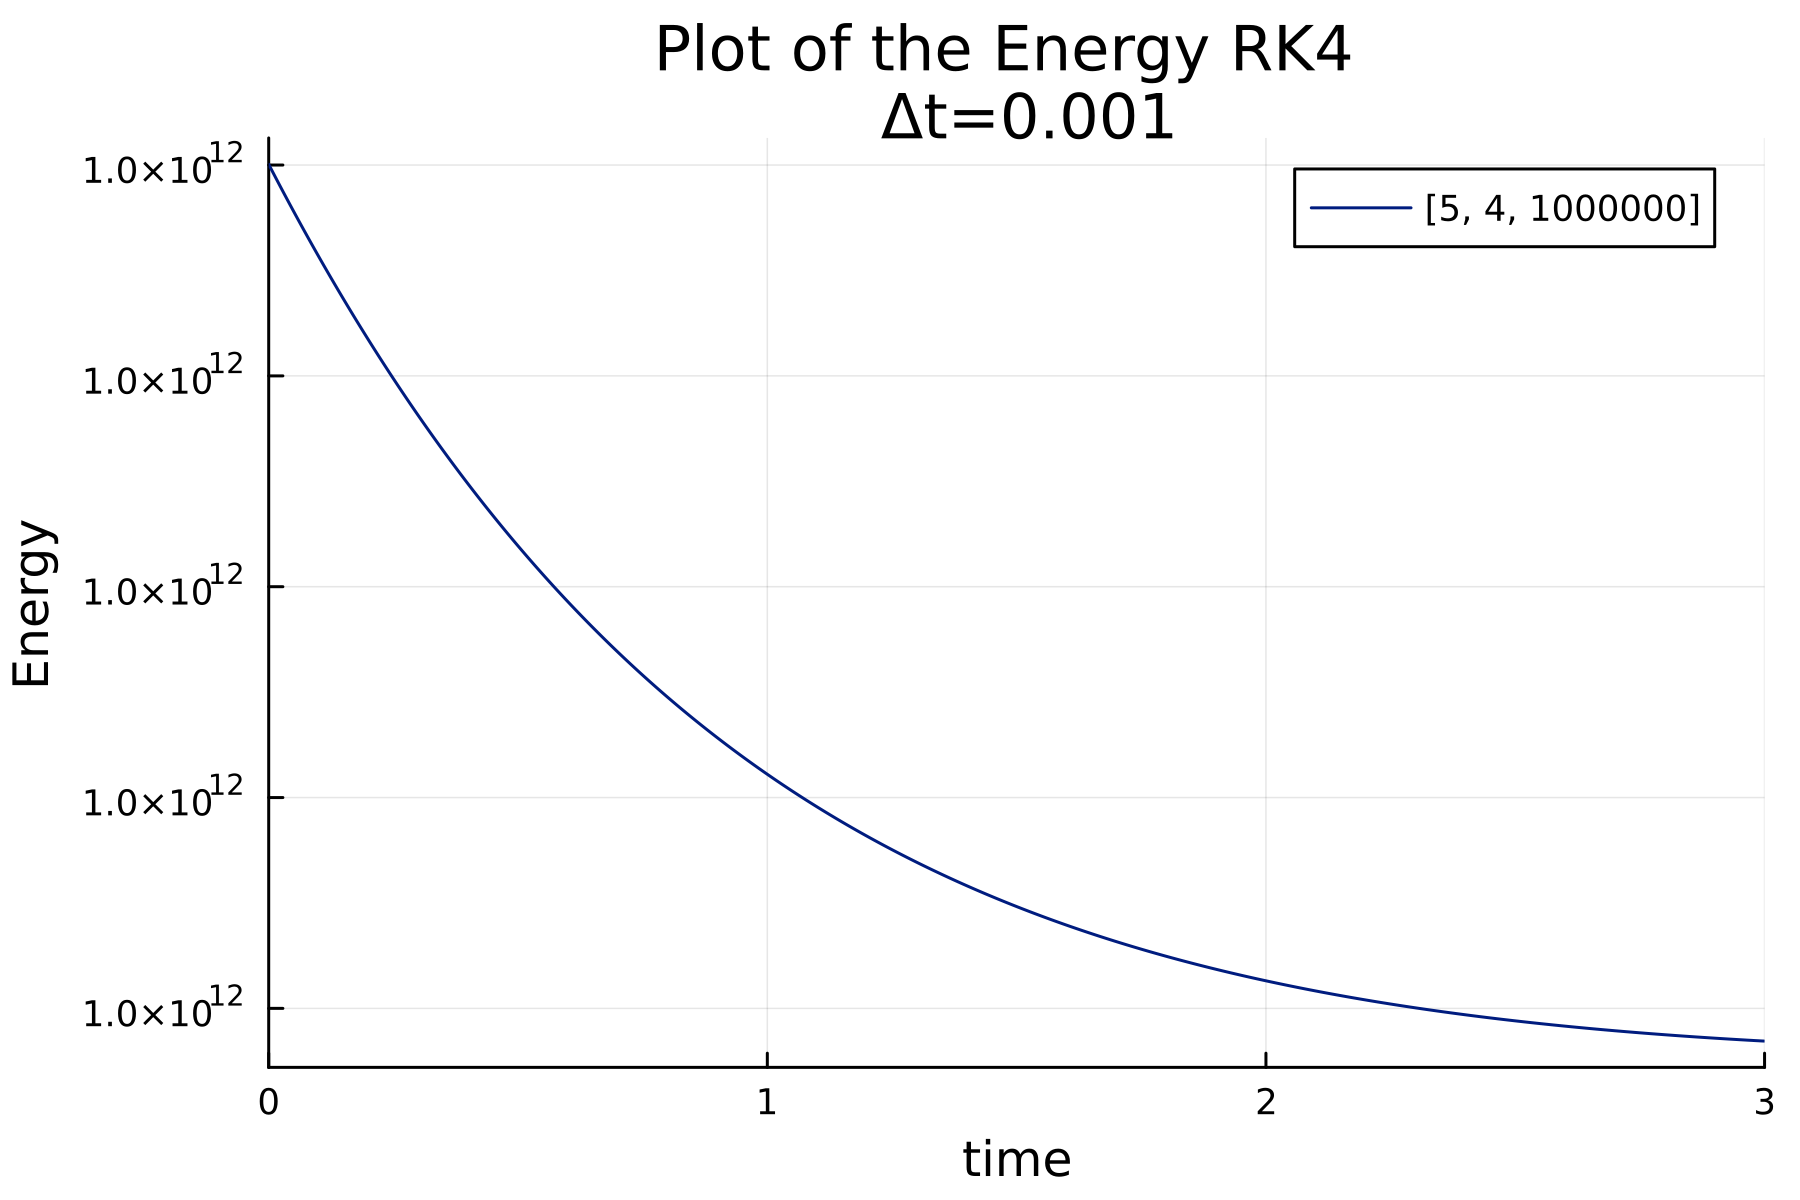

In [335]:
Plot_Energies_Fixp(RK4,x₀, 3, Δt, P5)

In [347]:
Δt_RK = Δt
tsteps_RK = Int(10/Δt_RK)
x̄=x₀
XRK = zeros(3,tsteps_RK)
for i=1:tsteps_RK
    x̄=RK4(P4(x̄),x̄,Δt_RK)
    XRK[:,i] = x̄
end

In [203]:
print(XRK[end])

185.53285207863848

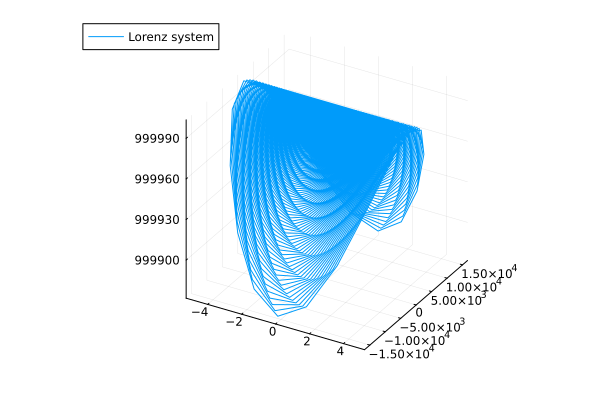

In [348]:
plot(XRK[1,:],XRK[2,:],XRK[3,:],label="Lorenz system")

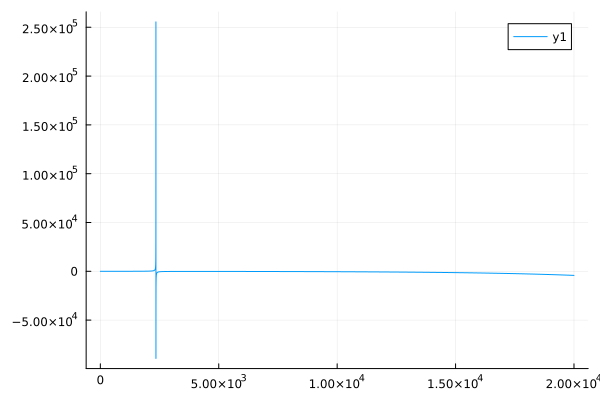

In [339]:
mus = Track_Mu(RK4, Δt, 20, x, P5)
plot(mus)

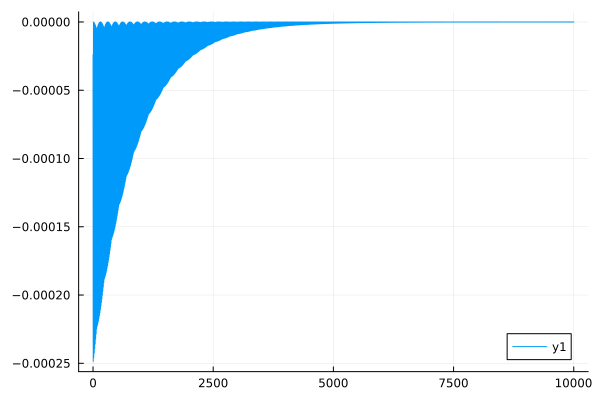

In [346]:
betas = Track_Beta(RK4, Δt, 10, x₀, P4)
plot(betas)